In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import * 
from scipy.optimize import curve_fit
import numpy as np
import time
import cv2
import statistics
import pandas as pd

In [17]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

def ExpFit(x,y):
    p0 = (1.,1.e-5,1.) 
    opt, pcov = curve_fit(model_func, x, y, p0)
    a, k, b = opt
    return a, k, b

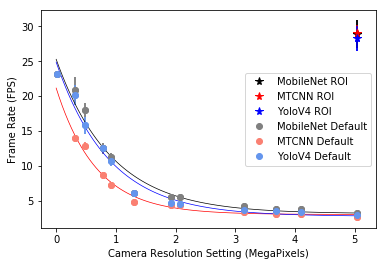

In [18]:
#################
###  Figure 1 ###
#################

[RES1, FPS1, ERR1, MTC_ROI_Y, MTC_ROI_E, YOLO_ROI_Y, YOLO_ROI_E, xR, yR, eR, xM, yM, eM, xR, yY, eY] = [5.038848, 28.896360999999995, 1.9844471686562433, 29.074599, 1.1908110271244177, 28.297534999999996, 1.8221867142666797, [0.48, 0.786432, 1.31072, 1.92, 0.9216, 2.0736, 3.6864, 3.145728, 4.096, 5.038848, 0.3072, 0.0192], [18.016547000000003, 12.516158, 6.164909400000001, 5.491764099999999, 11.240145, 5.5017467, 3.8522859000000005, 4.281659100000001, 3.8429971000000003, 3.29616911, 20.856086999999995, 23.179204], [0.9624854837468112, 0.7530665161827046, 0.23261271209181816, 0.1574868167551035, 0.5459779442279087, 0.2514373425801923, 0.18361928786997775, 0.31181162765663145, 0.14479962854882525, 0.23054373532766423, 1.817249726244152, 0.25574417991422627], [0.48, 0.786432, 1.31072, 1.92, 0.9216, 2.0736, 3.6864, 3.145728, 4.096, 5.038848, 0.3072], [12.844036, 8.718259, 4.8302097, 4.4474317, 7.2236229000000005, 4.376941599999999, 3.0536276, 3.3544050999999997, 3.0878687, 2.6453023, 13.986692], [0.515808727344201, 0.35787890962105534, 0.3116095481481949, 0.1890065029422415, 0.47251499206843506, 0.15077485383047143, 0.18144830971822248, 0.1172843934265482, 0.12663053223457255, 0.11040783331614959, 0.39938751206761064], [0.48, 0.786432, 1.31072, 1.92, 0.9216, 2.0736, 3.6864, 3.145728, 4.096, 5.038848, 0.3072, 0.0192], [15.789844000000002, 12.609103000000001, 6.037549199999999, 4.606683200000001, 10.739399299999999, 4.4613727, 3.5870638, 3.7286975000000004, 3.3440838, 2.9609974, 20.158593999999997, 23.178784], [1.256763561341415, 0.3933410056892958, 0.33107956948134926, 0.2464434635966454, 0.8039624086751059, 0.08562334472307588, 0.13263839347623133, 0.24891906620303106, 0.05648700218791742, 0.10643975632169693, 1.374744291869097, 0.41504737103666167]]

fig,(ax1) = plt.subplots(1,1)

ax1.errorbar(RES1, FPS1, yerr=ERR1, fmt='*', label = 'MobileNet ROI', color = 'k', markersize = 8)
ax1.errorbar(RES1, MTC_ROI_Y, yerr=MTC_ROI_E, fmt='*', label = 'MTCNN ROI', color = 'r', markersize = 8)
ax1.errorbar(RES1, YOLO_ROI_Y, yerr=YOLO_ROI_E, fmt='*', label = 'YoloV4 ROI', color = 'b', markersize = 8)

ax1.errorbar(xR, yR, yerr=eR, fmt='o', label = 'MobileNet Default', color = 'gray', markersize = 6)
ax1.errorbar(xM, yM, yerr=eM, fmt='o', label = 'MTCNN Default', color = 'salmon', markersize = 6)
ax1.errorbar(xR, yY, yerr=eY, fmt='o', label = 'YoloV4 Default', color = 'cornflowerblue', markersize = 6)


x = np.linspace(0,5.1,100)
a1,k1,b1 = ExpFit(xR,yR)
yF1 = model_func(x, a1, k1, b1)
ax1.plot(x,yF1, 'k', linewidth = 0.7)

a2,k2,b2 = ExpFit(xM,yM)
yF2 = model_func(x, a2, k2, b2)
ax1.plot(x,yF2, 'r', linewidth = 0.7)

a3,k3,b3 = ExpFit(xR,yY)
yF3 = model_func(x, a3, k3, b3)
ax1.plot(x,yF3, 'b', linewidth = 0.7)

handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax1.legend(handles, labels, loc='center right')

plt.xlabel('Camera Resolution Setting (MegaPixels)')
plt.ylabel('Frame Rate (FPS)')

ax1.errorbar(RES1, FPS1, yerr=ERR1, fmt='*', label = 'MobileNet ROI', color = 'k', markersize = 8)
ax1.errorbar(RES1, MTC_ROI_Y, yerr=MTC_ROI_E, fmt='*', label = 'MTCNN ROI', color = 'r', markersize = 8)
ax1.errorbar(RES1, YOLO_ROI_Y, yerr=YOLO_ROI_E, fmt='*', label = 'YoloV4 ROI', color = 'b', markersize = 8)

ax1.errorbar(xR, yR, yerr=eR, fmt='o', label = 'MobileNet Default', color = 'gray', markersize = 6)
ax1.errorbar(xM, yM, yerr=eM, fmt='o', label = 'MTCNN Default', color = 'salmon', markersize = 6)
ax1.errorbar(xR, yY, yerr=eY, fmt='o', label = 'YoloV4 Default', color = 'cornflowerblue', markersize = 6)


plt.savefig("fig1.svg")

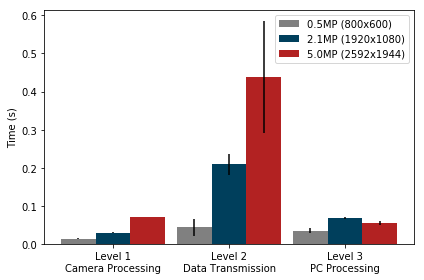

<Figure size 432x288 with 0 Axes>

In [19]:
#################
###  Figure 4 ###
#################

[CAP_GA2, TRN_GA2, PRO_GA2, t_GA2, CAP_FHD, TRN_FHD, PRO_FHD, t_FHD, CAP_VGA, TRN_VGA, PRO_VGA, t_VGA, err3, err2, err1] = [0.0705505365, 0.43874758, 0.055788669586181644, 1, 0.030453492, 0.20954590499999998, 0.06883150100708008, 1, 0.014553834000000002, 0.044648743500000004, 0.034891927242279054, 1, [0.0005169439054003115, 0.022672536018062697, 0.006290174964693933], [0.0005069858717184391, 0.027814591802495455, 0.00304748406253116], [0.0005044405388074662, 0.14621878332450494, 0.006043666136111226]]

labels = ['Level 1\nCamera Processing', 'Level 2\nData Transmission', 'Level 3\nPC Processing']
box_GA2 = [CAP_GA2/t_GA2, TRN_GA2/t_GA2, PRO_GA2/t_GA2]
box_FHD = [CAP_FHD/t_FHD, TRN_FHD/t_FHD, PRO_FHD/t_FHD]
box_VGA = [CAP_VGA/t_VGA, TRN_VGA/t_VGA, PRO_VGA/t_VGA]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects3 = ax.bar(x - width, box_VGA, width, yerr=err3, label='0.5MP (800x600)', color = 'grey')
rects2 = ax.bar(x, box_FHD, width, yerr=err2, label='2.1MP (1920x1080)', color = '#003f5c')
rects1 = ax.bar(x + width, box_GA2, width, yerr=err1, label='5.0MP (2592x1944)', color = 'firebrick')

ax.set_ylabel('Time (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
plt.savefig("fig4.svg")

[0.01, 0.03, 0.0672, 0.12, 0.187, 0.27, 0.3668, 0.48]


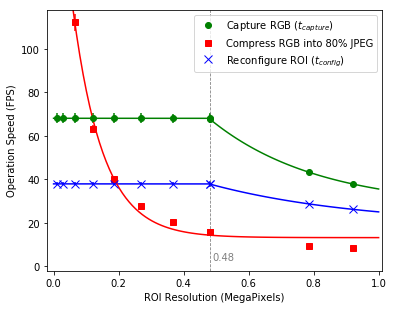

In [20]:
#################
###  Figure 5 ###
#################

[XXXI, CaptuI, CapErrI, ProceI, ProErrI, ResetI, ResErrI, XXXbI, ProcebI, CaptubI, ResetbI, ProErrbI, CapErrbI, ResErrbI] = [[0.01, 0.03, 0.0672, 0.12, 0.187, 0.27, 0.3668, 0.48], [68.14318588612169, 68.14285787778635, 68.14293540641654, 68.14259679821329, 68.14276610231492, 68.14312795263669, 68.09519398972772, 68.14312795263669], [2.2144259053020887, 2.213440466076697, 2.2131814200588917, 2.213410416136876, 2.2132959276002766, 2.2134797512335562, 2.1934172636068023, 2.2134797512335562], [784.9691340824351, 250.33803874721931, 112.22233674012375, 63.37489117279437, 40.249981202193965, 27.936432051038047, 20.55698357423746, 15.944689428097181], [248.81663718070573, 9.757156285046037, 3.785242657095452, 1.7054714300839595, 0.5979151280791617, 0.3188621067918374, 0.20388056314223627, 0.11531858398032434], [37.96329449366997, 37.977329841189174, 37.97716213494069, 37.96283351747549, 37.977178700877744, 37.97738930483262, 37.948577855447006, 37.94870707801741], [0.6838976860852368, 0.6781573496283921, 0.6780417130501499, 0.6832124296970856, 0.6784978903325463, 0.6783286777339135, 0.6871237707466747, 0.6876574678524332], [0.9216, 0.48, 0.786432], [8.261108399595507, 15.898676741186554, 9.337018117758273], [37.88854132126448, 67.85296902420103, 43.299270103629425], [26.24939276138584, 37.91641676792682, 28.746026007806925], [0.014827134733057166, 0.07918979409743643, 0.0266646034342873], [0.7182409542676103, 2.096001224228111, 0.5511450628298092], [0.31029556259773394, 1.2962706103033892, 0.5059585040848612]]
fig,(ax1) = plt.subplots(1,1, figsize=(8*0.75,6*0.75))

ax1.errorbar(XXXI, CaptuI, yerr=CapErrI, fmt='o', label = 'Capture RGB ($t_{capture}$)', color = 'g', markersize = 6)
ax1.errorbar(XXXI[2:], ProceI[2:], yerr=ProErrI[2:], fmt='s', label = 'Compress RGB into 80% JPEG', color = 'r', markersize = 6)
ax1.errorbar(XXXI, ResetI, yerr=ResErrI, fmt='x', label = 'Reconfigure ROI ($t_{config}$)', color = 'b', markersize = 8)

ax1.errorbar(XXXbI, ProcebI, yerr=ProErrbI, fmt='s', color = 'r', markersize = 6) #COMPRESS BIG
ax1.errorbar(XXXbI, CaptubI, yerr=CapErrbI, fmt='o', color = 'g', markersize = 6) #CAPTURE BIG
ax1.errorbar(XXXbI, ResetbI, yerr=ResErrbI, fmt='x', color = 'b', markersize = 8) #RESET BIG

#######################################################

m1,b1 = np.polyfit(XXXI, CaptuI, 1)
m2,b2 = np.polyfit(XXXI, ProceI, 1)
m3,b3 = np.polyfit(XXXI, ResetI, 1)

x = np.linspace(0,0.48,100)
y1 = m1*x + b1
y2 = m2*x + b2
y3 = m3*x + b3

plt.plot(x,y1, 'g')
plt.plot(x,y3, 'b')

#######################################################

x2 = np.linspace(0.48,1.0,100)
xall = np.linspace(0,1.0,100)

a2,k2,b2 = ExpFit(XXXI[2:]+ProcebI,ProceI[2:]+ProcebI)
yF2 = model_func(xall, a2, k2, b2)
ax1.plot(xall,yF2, 'r') 

a3,k3,b3 = ExpFit(XXXbI,CaptubI)
yF3 = model_func(x2, a3, k3, b3)
ax1.plot(x2,yF3, 'g') 

a4,k4,b4 = ExpFit(XXXbI,ResetbI)
yF4 = model_func(x2, a4, k4, b4)
ax1.plot(x2,yF4, 'b') 

m4 = 0.0929628354360568
b4 = 0.008128186665854048
y4 = m4*xall + b4

#######################################################

y48 = np.linspace(-2,118,100)
x48 = []
for i in range (0, len(y48)):
    x48.append(0.48)

plt.plot(x48, y48, color = 'gray', linestyle='--', linewidth = 0.8)
plt.text(0.49, 3, '0.48', color = 'grey')

#######################################################

fig.set_figheight(8*0.6)
fig.set_figwidth(10*0.6)

handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] for h in handles]

ax1.legend(handles, labels, loc='upper right')

plt.ylim((-2,118))
plt.xlim((-0.02,1.01))
plt.xlabel('ROI Resolution (MegaPixels)')
plt.ylabel('Operation Speed (FPS)')

print(XXXI)
plt.savefig("fig5.svg")

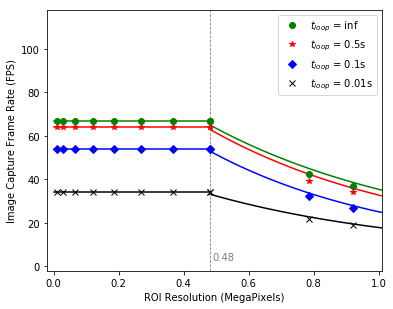

In [21]:
#################
###  Figure 6 ###
#################
[xINF, yINF, x05, y05, x01, y01, x001, y001, eINF, e05, e01, e001] = [[3.145728, 0.9216, 0.48, 2.0736, 1.31072, 0.786432, 3.6864, 5.038848, 1.92, 4.096], [11.525825240020989, 37.10730447026503, 66.87198504902345, 17.221903071611308, 26.355936900164036, 42.63665200097657, 9.935845245701103, 7.363233460889081, 18.43769789512941, 8.96773072161961], [3.145728, 0.9216, 0.48, 2.0736, 1.31072, 0.786432, 3.6864, 5.038848, 1.92, 4.096], [9.04499933802811, 34.29336464546148, 64.20566988476445, 14.684559341668088, 23.565453398337226, 39.38556936369856, 7.801039285399244, 6.197326597252477, 15.705115589043372, 6.8250843272699715], [3.145728, 0.9216, 0.48, 2.0736, 1.31072, 0.786432, 3.6864, 5.038848, 1.92, 4.096], [6.971789360039559, 26.946921839644794, 54.02536222095648, 10.444416750950724, 17.909926140681442, 32.33630886106604, 6.0130519357404655, 4.957855747231719, 11.170655670571108, 4.555704884297953], [3.145728, 0.9216, 0.48, 2.0736, 1.31072, 0.786432, 3.6864, 5.038848, 1.92, 4.096], [5.8563438893353945, 18.86264672703561, 34.03088817534662, 8.773461332285198, 13.431820816286674, 21.663646754309116, 5.0508825943178035, 4.957855747231719, 9.383948494053211, 4.555806580532181], [0.1004731912910274, 0.35060621742317255, 0.7294810436298177, 0.2137526925698132, 0.33903938399423783, 0.3726471463464893, 0.09211034527462802, 0.0, 0.20656482887678507, 0.0756627603012888], [0.04975010054507009, 0.0, 0.02844995214530547, 0.08840964567167742, 0.004075997877194951, 0.0, 0.04304839883079886, 0.0, 0.09229181767044636, 0.036225020804604], [0.00034369523892964493, 0.0, 0.0012589550138569006, 0.0007998934536631967, 0.0024904333748307825, 0.007674732233908125, 0.0002505537962745336, 1.0428552347677822e-05, 0.0, 0.00016143171219024828], [0.0002376644471656035, 0.0026114854687765443, 0.00850019541452306, 0.0, 0.0, 0.0, 0.0001767850862967612, 1.0428552347677822e-05, 0.0006039875217897965, 1.761151850091951e-05]]


fig,(ax1) = plt.subplots(1,1)
ax1.errorbar(xINF, yINF, yerr=eINF, fmt='o', label = '$t_{loop}$ = inf', color = 'g', markersize = 6)
ax1.errorbar(x05, y05, yerr=e05, fmt='*', label = '$t_{loop}$ = 0.5s', color = 'r', markersize = 6)
ax1.errorbar(x01, y01, yerr=e01, fmt='D', label = '$t_{loop}$ = 0.1s', color = 'b', markersize = 6)
ax1.errorbar(x001, y001, yerr=e001, fmt='x', label = '$t_{loop}$ = 0.01s', color = 'k', markersize = 6)

smlX = [0.01, 0.03, 0.0672, 0.12, 0.187, 0.27, 0.3668, 0.48]

sINF = []
s05  = []
s01 = []
s001 = []
exINF = []
ex05  = []
ex01 = []
ex001 = []
for i in range (0, len(smlX)):
    sINF.append(yINF[2])
    s05.append(y05[2])
    s01.append(y01[2])
    s001.append(y001[2])
    exINF.append(eINF[2])
    ex05.append(e05[2])
    ex01.append(e01[2])
    ex001.append(e001[2])
    
mmmmX = np.linspace(0,0.48,100)    
m1,b1 = np.polyfit(smlX, sINF, 1)
m2,b2 = np.polyfit(smlX, s05, 1)
m3,b3 = np.polyfit(smlX, s01, 1)
m4,b4 = np.polyfit(smlX, s001, 1)
y1 = m1*mmmmX + b1
y2 = m2*mmmmX + b2
y3 = m3*mmmmX + b3
y4 = m4*mmmmX + b4

ax1.errorbar(smlX, sINF, yerr=exINF, fmt='o', color = 'g', markersize = 6)
ax1.errorbar(smlX, s05, yerr=ex05, fmt='*', color = 'r', markersize = 6)
ax1.errorbar(smlX, s01, yerr=ex01, fmt='D', color = 'b', markersize = 6)
ax1.errorbar(smlX, s001, yerr=ex001, fmt='x', color = 'k', markersize = 6)

plt.plot(mmmmX,y1, 'g')
plt.plot(mmmmX,y2, 'r')
plt.plot(mmmmX,y3, 'b')
plt.plot(mmmmX,y4, 'k')

x = np.linspace(0.48,2,100)

a1,k1,b1 = ExpFit(x01,y01)
yF1 = model_func(x, a1, k1, b1)
ax1.plot(x,yF1, 'b')

for i in range (0, len(y05)):
    y05[i] += 0.5
a5,k5,b5 = ExpFit(x05,y05)
yF5 = model_func(x, a5, k5, b5)
ax1.plot(x,yF5, 'r')

aI,kI,bI = ExpFit(xINF,yINF)
yINF = model_func(x, aI, kI, bI)
ax1.plot(x,yINF, 'g')

a001,k001,b001 = ExpFit(x001,y001)
yF001 = model_func(x, a001, k001, b001)
ax1.plot(x,yF001, 'k')

#######################################################
#ADD 0.48

y48 = np.linspace(-2,118,100)
x48 = []
for i in range (0, len(y48)):
    x48.append(0.48)

plt.plot(x48, y48, color = 'gray', linestyle='--', linewidth = 0.8)
plt.text(0.49, 3, '0.48', color = 'grey')

#######################################################

fig.set_figheight(8*0.6)
fig.set_figwidth(10*0.6)

handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] for h in handles]

ax1.legend(handles, labels, loc='upper right')

plt.ylim((-2,118))
plt.xlim((-0.02,1.01))
plt.xlabel('ROI Resolution (MegaPixels)')
plt.ylabel('Image Capture Frame Rate (FPS)')
plt.savefig("fig6.svg")

2.0983990336714897


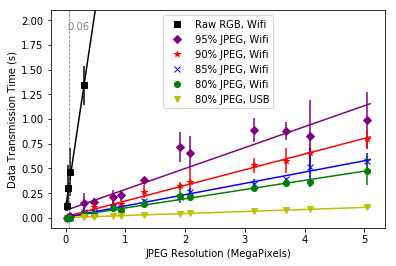

In [22]:
#################
###  Figure 7 ###
#################

[X95, Y95, X90, Y90, X85, Y85, X80, Y80, Xusb, Yusb, XRGB, YRGB, ERGB, Eusb, E95, E90, E85, E80] = [[0.0768, 0.9216, 0.0192, 0.0384, 0.3072, 0.48, 0.786432, 1.92, 2.0736, 3.145728, 1.31072, 3.6864, 5.038848, 4.096], [0.0208526615, 0.22800598, 0.00244750985, 0.00465087895, 0.15510863349999998, 0.16245117, 0.21646727999999998, 0.7195129499999999, 0.66141969, 0.8883606000000001, 0.38263548999999997, 0.8792541499999998, 0.9882958949999999, 0.8244506750000001], [0.3072, 0.0384, 0.786432, 0.0768, 0.9216, 1.92, 0.0192, 1.31072, 0.48, 2.0736, 3.6864, 5.038848, 3.145728, 4.096], [0.06434936549999999, 0.0028076174000000002, 0.12965392999999997, 0.0049499513500000005, 0.13934631999999997, 0.326455685, 0.0017974852750000003, 0.26585084, 0.10789795350000002, 0.362915035, 0.580688475, 0.7935852, 0.5324401849999998, 0.653759765], [0.3072, 0.0384, 0.786432, 2.0736, 3.6864, 0.0768, 0.9216, 1.92, 0.0192, 1.31072, 0.48, 4.096, 3.145728, 5.038848], [0.0636016865, 0.00219879165, 0.11220093150000002, 0.261248775, 0.3974090600000001, 0.00379943835, 0.1047058155, 0.21455383499999997, 0.001348877, 0.17500000000000002, 0.06039733900000001, 0.5128906049999999, 0.3393127450000001, 0.5806091350000001], [0.3072, 0.0384, 0.786432, 2.0736, 3.6864, 4.096, 0.0768, 0.9216, 1.92, 0.0192, 1.31072, 3.145728, 0.48, 5.038848], [0.037448884, 0.0017501828299999998, 0.10104980599999999, 0.20954590499999998, 0.355001835, 0.36015168499999994, 0.0029998781, 0.08200073150000001, 0.22094727499999997, 0.001300048825, 0.142053225, 0.29804687, 0.044648743500000004, 0.47874758], [0.3072, 0.48, 0.786432, 1.31072, 1.92, 0.9216, 2.0736, 3.6864, 3.145728, 4.096, 5.038848], [0.009612333774566651, 0.01373368501663208, 0.020863771438598633, 0.030782902240753175, 0.04353001117706299, 0.02208954095840454, 0.0451148509979248, 0.07706468105316162, 0.07019357681274414, 0.08556396961212158, 0.10807725191116332], [0.0768, 0.0192, 0.0384, 0.3072], [0.4599395950000001, 0.12339172350000001, 0.30675051, 1.340705882352941], [0.2424343227798613, 0.055508825933752025, 0.22581523091903186, 0.1994723119250772], [9.441706784313943e-05, 0.00013527789799125007, 9.783660318551684e-05, 0.00011040904215423895, 0.0002250539771454754, 0.00017480787914303758, 0.0001014999694214841, 0.00014437280554596417, 0.009807527185772658, 0.00022099743456329538, 0.009777228597906756], [0.018905207235943803, 0.052250903396104574, 0.0005110024161612745, 0.0004889235180521295, 0.09662851624226367, 0.03835987210525713, 0.0630131772186839, 0.14968953373667673, 0.1645522539996239, 0.11921564918201584, 0.03349166500959054, 0.09169142626241733, 0.2882952443079152, 0.37177341565596234], [0.06099432755794344, 0.00040775696074918263, 0.03221070667170517, 0.00021773669661271706, 0.026430645828511463, 0.041984328381260934, 0.0004141854029097189, 0.0645780543896943, 0.05948225252313874, 0.13467522024534773, 0.1264629070842134, 0.09422354621089037, 0.07518248941144036, 0.10079197306691313], [0.08073575269683114, 0.0004143717820041467, 0.04728924870107851, 0.039549405046624575, 0.00747737662710519, 0.00040817707191703685, 0.033749296839801206, 0.015572854678212043, 0.0004886423951241149, 0.016556162699541348, 0.014678462527739461, 0.19790069614436076, 0.057598765864012594, 0.07619879567457104], [0.012816677337483871, 0.00044382096958032655, 0.040269413184677624, 0.027814591802495455, 0.04554267761239566, 0.0357629146215561, 1.4347944312321462e-05, 0.015309385000594719, 0.06958107465715142, 0.0004695930804592048, 0.027009327275004266, 0.022925195454693393, 0.022672536018062697, 0.14621878332450494]]

fig,(ax1) = plt.subplots(1,1)

ax1.errorbar(XRGB, YRGB, yerr=ERGB, fmt='s', label = 'Raw RGB, Wifi', color = 'k', markersize = 6)
ax1.errorbar(X95, Y95, yerr=E95, fmt='D', label = '95% JPEG, Wifi', color = 'purple', markersize = 6)
ax1.errorbar(X90, Y90, yerr=E90, fmt='*', label = '90% JPEG, Wifi', color = 'r', markersize = 6)
ax1.errorbar(X85, Y85, yerr=E85, fmt='x', label = '85% JPEG, Wifi', color = 'b', markersize = 6)
ax1.errorbar(X80, Y80, yerr=E80, fmt='o', label = '80% JPEG, Wifi', color = 'g', markersize = 6)
ax1.errorbar(Xusb, Yusb, yerr=Eusb, fmt='v', label = '80% JPEG, USB', color = 'y', markersize = 6)

m1,b1 = np.polyfit(X80, Y80, 1)
m2,b2 = np.polyfit(X85, Y85, 1)
m3,b3 = np.polyfit(X90, Y90, 1)
m4,b4 = np.polyfit(X95, Y95, 1)
m5,b5 = np.polyfit(Xusb, Yusb, 1)
m6,b6 = np.polyfit(XRGB, YRGB, 1)

x = np.linspace(0,5.1,100)
y1 = m1*x + b1
y2 = m2*x + b2
y3 = m3*x + b3
y4 = m4*x + b4
y5 = m5*x + b5

xSML = np.linspace(0,1.0,100)
y6 = m6*xSML + b6

plt.plot(x,y1, 'g')
plt.plot(x,y2, 'b')
plt.plot(x,y3, 'r')
plt.plot(x,y4, 'purple')
plt.plot(x,y5, 'y')
plt.plot(xSML,y6, 'k')

################################
y48 = np.linspace(-2,118,100)
x48 = []
for i in range (0, len(y48)):
    x48.append(0.06)
plt.plot(x48, y48, color = 'gray', linestyle='--', linewidth = 0.8)
plt.text(0.02, 1.9, '0.06', color = 'grey')
################################

handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax1.legend(handles, labels, loc='upper center')

plt.ylim(-0.1, 2.1)
plt.xlabel('JPEG Resolution (MegaPixels)')
plt.ylabel('Data Transmission Time (s)')
plt.savefig("fig7.svg")


val = 2592*1944
val /= 1000000
print(1/(m1*val+b1))

[0.0048, 0.0192, 0.0384, 0.0768, 0.3072, 0.48, 0.786432, 1.31072, 1.92, 3.145728, 4.096, 5.038848, 0.9216, 2.0736, 3.6864]
[73.12157901971982, 55.6395358691838, 51.60479093615138, 44.92696342722457, 29.357915400989185, 23.761693474675095, 16.586753129958698, 21.19631424539334, 16.52109630402112, 14.964958644650048, 12.397114227031102, 18.12273268491797, 15.09119928484939, 14.554376644949127, 15.169185981520906]


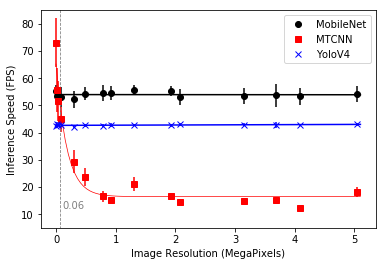

In [23]:
#################
###  Figure 8 ###
#################

[res, insgFPS, resM, mFPS, YoloX, YoloY, insgFPSstd, mFPSstd, YoloERR] = [[0.0048, 0.0192, 0.0384, 0.0768, 0.3072, 0.48, 0.786432, 1.31072, 1.92, 3.145728, 4.096, 5.038848, 0.9216, 2.0736, 3.6864], [55.427215915657435, 53.35270334645527, 53.28162011879869, 53.140379687692985, 52.24790233820739, 54.3120345733726, 54.764529957375565, 55.65348919883582, 55.37397424547234, 53.53665492641196, 53.435836143699554, 54.13072354241453, 54.49732092731483, 52.97305876814116, 53.799935810635745], [0.0048, 0.0192, 0.0384, 0.0768, 0.3072, 0.48, 0.786432, 1.31072, 1.92, 3.145728, 4.096, 5.038848, 0.9216, 2.0736, 3.6864], [73.12157901971982, 55.6395358691838, 51.60479093615138, 44.92696342722457, 29.357915400989185, 23.761693474675095, 16.586753129958698, 21.19631424539334, 16.52109630402112, 14.964958644650048, 12.397114227031102, 18.12273268491797, 15.09119928484939, 14.554376644949127, 15.169185981520906], [0.0048, 0.0192, 0.0384, 0.0768, 0.3072, 0.48, 0.786432, 1.31072, 1.92, 3.145728, 4.096, 5.038848, 0.9216, 2.0736, 3.6864], [42.51928928740583, 43.07462871784721, 42.703768487781616, 42.898372326557336, 42.22420892396871, 42.74105062120927, 42.570228254033026, 42.79227381335799, 42.70562159498365, 42.99830873440753, 42.96542225391388, 43.04439051813651, 42.83414928988013, 43.02689267787051, 42.85922255059236], [2.1107272562310304, 2.7449724250535636, 2.881961847279724, 3.6034047370434408, 3.1044100024672168, 2.3403732624680207, 2.9493102821644586, 1.8006209324949767, 1.959450108467023, 2.885493106870993, 3.1688519821701244, 2.9369106110988246, 2.578732465624179, 2.9368417530035176, 4.205758225194908], [9.121396346918273, 7.994291716802571, 7.303019127600699, 4.672499042337594, 4.326406423318888, 3.251029104919706, 2.0933835373671608, 2.562295903655869, 1.0919258399235403, 1.0911186581743022, 1.1414889982870777, 1.8499978516051914, 1.0796616314184102, 0.5991547886352514, 0.44014551584695333], [0.6642821253846874, 0.8632915958421387, 0.66675650714194, 0.6938507439408289, 0.6186470707069871, 0.5240642253170513, 0.5503683393651004, 0.5075263616538683, 0.5493058712164872, 0.632058387695525, 0.4078537486127835, 0.5301961274220541, 0.6041875748865275, 0.5289693043364823, 1.0305310691281573]]

fig,(ax1) = plt.subplots(1,1)
ax1.errorbar(res, insgFPS, yerr=insgFPSstd, fmt='o', label = 'MobileNet', color = 'k', markersize = 6)
ax1.errorbar(resM, mFPS, yerr=mFPSstd, fmt='s', label = 'MTCNN', color = 'r', markersize = 6)
ax1.errorbar(YoloX, YoloY, yerr=YoloERR, fmt='x', label = 'YoloV4', color = 'b', markersize = 6)

x = np.linspace(0,5.1,100)
a1,k1,b1 = ExpFit(resM,mFPS)
yF1 = model_func(x, a1, k1, b1)
ax1.plot(x,yF1, 'r', linewidth = 0.7)

m2,b2 = np.polyfit(res, insgFPS, 1)
y2 = m2*x + b2
plt.plot(x,y2, 'k')

m3,b3 = np.polyfit(YoloX, YoloY, 1)
y3 = m3*x + b3
plt.plot(x,y3, 'b')

################################
y48 = np.linspace(-10,118,100)
x48 = []
for i in range (0, len(y48)):
    x48.append(0.06)
plt.plot(x48, y48, color = 'gray', linestyle='--', linewidth = 0.8)
plt.text(0.1, 12, '0.06', color = 'grey')
################################


handles, labels = ax1.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax1.legend(handles, labels, loc='upper right')

plt.ylim(5, 85)
plt.xlabel('Image Resolution (MegaPixels)')
plt.ylabel('Inference Speed (FPS)')
plt.savefig("fig8.svg")

print(res)
print(mFPS)

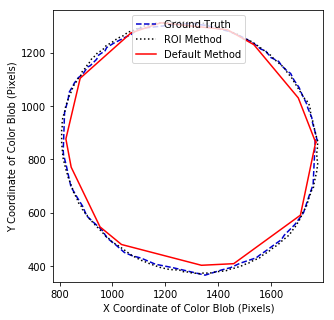

In [24]:
#################
###  Figure 9 ###
#################

[nVX2, nVY2, newX, newY, W2X, W2Y] = [[1766, 1758, 1742, 1722, 1713, 1689, 1673, 1649, 1638, 1604, 1588, 1556, 1543, 1483, 1446, 1414, 1350, 1228, 1162, 1108, 1074, 1045, 1013, 980, 960, 924, 903, 887, 867, 843, 834, 826, 815, 814, 819, 826, 834, 835, 850, 856, 871, 887, 906, 916, 940, 948, 972, 978, 1004, 1045, 1070, 1098, 1264, 1313, 1329, 1357, 1406, 1440, 1471, 1487, 1518, 1533, 1561, 1578, 1599, 1604, 1628, 1639, 1661, 1673, 1685, 1705, 1717, 1733, 1738, 1753, 1754, 1766, 1774], [875, 705, 660, 600, 587, 555, 539, 515, 498, 474, 462, 440, 430, 410, 393, 385, 365, 393, 406, 429, 438, 450, 478, 504, 535, 567, 587, 624, 656, 697, 737, 774, 818, 831, 976, 1001, 1033, 1049, 1074, 1086, 1106, 1118, 1146, 1151, 1175, 1191, 1207, 1219, 1235, 1256, 1268, 1290, 1308, 1309, 1305, 1302, 1288, 1280, 1267, 1260, 1244, 1235, 1213, 1207, 1181, 1179, 1167, 1151, 1130, 1122, 1098, 1069, 1041, 1009, 992, 956, 944, 900, 867], [1752, 1752, 1752, 1754, 1756, 1756, 1754, 1756, 1754, 1756, 1758, 1760, 1758, 1756, 1758, 1756, 1756, 1758, 1756, 1756, 1756, 1758, 1758, 1756, 1756, 1758, 1762, 1766, 1768, 1776, 1774, 1774, 1772, 1772, 1776, 1774, 1772, 1766, 1762, 1760, 1754, 1740, 1736, 1730, 1722, 1710, 1700, 1690, 1682, 1668, 1636, 1626, 1602, 1588, 1570, 1556, 1528, 1514, 1502, 1488, 1464, 1446, 1430, 1416, 1394, 1376, 1362, 1346, 1334, 1296, 1278, 1262, 1254, 1216, 1198, 1180, 1174, 1140, 1126, 1110, 1094, 1072, 1024, 1014, 998, 994, 984, 974, 970, 960, 952, 944, 936, 930, 916, 906, 904, 896, 896, 886, 882, 874, 870, 866, 862, 854, 852, 846, 842, 832, 828, 824, 820, 816, 812, 812, 810, 808, 808, 810, 810, 812, 816, 820, 824, 830, 832, 836, 842, 850, 852, 858, 866, 870, 880, 882, 884, 892, 896, 902, 906, 912, 916, 922, 928, 936, 944, 956, 966, 976, 1000, 1014, 1028, 1042, 1060, 1072, 1084, 1098, 1120, 1140, 1152, 1164, 1190, 1204, 1220, 1236, 1256, 1260, 1274, 1286, 1300, 1324, 1336, 1352, 1362, 1376, 1398, 1408, 1426, 1452, 1466, 1480, 1488, 1514, 1530, 1540, 1554, 1570, 1588, 1600, 1608, 1648, 1660, 1678, 1680, 1724, 1740, 1746, 1750, 1752], [948, 948, 948, 944, 946, 944, 944, 944, 944, 944, 944, 944, 944, 946, 946, 944, 944, 944, 944, 946, 944, 946, 946, 944, 946, 934, 918, 902, 892, 866, 850, 838, 826, 802, 788, 774, 756, 730, 712, 696, 688, 648, 634, 616, 608, 578, 562, 546, 536, 516, 490, 480, 464, 452, 442, 430, 418, 410, 406, 400, 392, 388, 382, 380, 378, 374, 372, 374, 370, 374, 378, 378, 384, 386, 390, 394, 396, 408, 414, 420, 428, 440, 474, 480, 490, 496, 504, 512, 516, 528, 536, 544, 552, 558, 574, 582, 590, 598, 604, 612, 624, 632, 640, 652, 660, 672, 682, 696, 708, 734, 750, 762, 778, 794, 810, 822, 840, 862, 910, 918, 940, 954, 968, 980, 1004, 1014, 1024, 1036, 1048, 1068, 1074, 1084, 1094, 1102, 1114, 1122, 1126, 1138, 1140, 1148, 1158, 1162, 1168, 1178, 1182, 1190, 1200, 1206, 1214, 1226, 1240, 1250, 1258, 1264, 1278, 1280, 1286, 1292, 1300, 1304, 1308, 1310, 1312, 1314, 1314, 1316, 1316, 1316, 1316, 1314, 1314, 1312, 1312, 1308, 1308, 1304, 1298, 1292, 1286, 1276, 1272, 1264, 1254, 1248, 1238, 1232, 1222, 1210, 1196, 1188, 1178, 1144, 1126, 1104, 1100, 1030, 1012, 996, 960, 964], [1768, 1710, 1458, 1336, 1034, 953, 844, 824, 878, 1070, 1182, 1434, 1534, 1702, 1768], [866, 590, 408, 402, 480, 546, 770, 876, 1104, 1274, 1312, 1286, 1230, 1030, 862]]

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)


ax.set_xlim(777,1797)
ax.set_ylim(340,1360)

ax.plot(nVX2[0:],nVY2[0:], label ="Ground Truth", color = "mediumblue", linestyle="dashed") 
ax.plot(newX[24:-1],newY[24:-1], label = "ROI Method", color = "black", linestyle="dotted") 
ax.plot(W2X,W2Y, label = "Default Method", color = "r")
ax.legend(loc="upper center")
plt.xlabel('X Coordinate of Color Blob (Pixels)')
plt.ylabel('Y Coordinate of Color Blob (Pixels)')
plt.gcf().subplots_adjust(left=0.15)
plt.savefig("fig9.svg")
